In [1]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

## Load Audio File

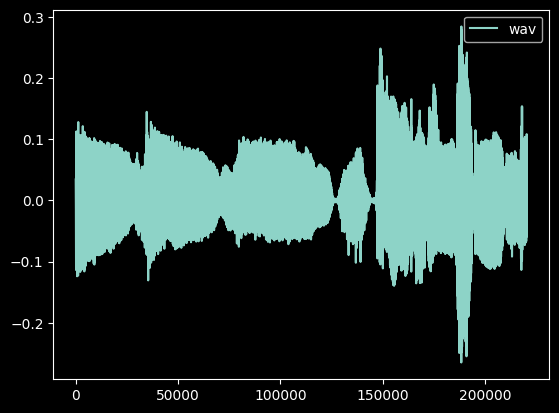

In [2]:
AUDIO_PATH = './test.wav'
wav, sr = sf.read(AUDIO_PATH)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.legend()

## Stereo Flanger

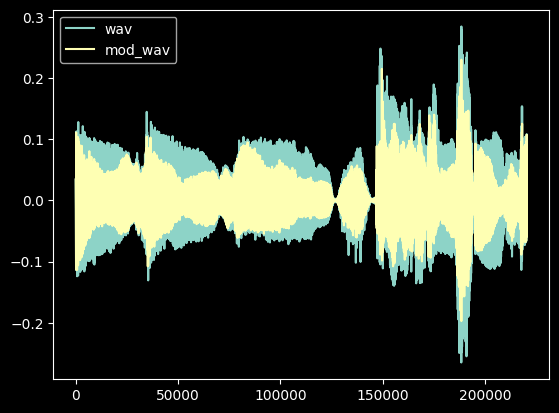

In [3]:
from diffFx_pytorch.processors.modulation import StereoFlanger  
DSP_PARAMS = {
    'delay_ms': 10.0,    # Increased range
    'rate': 0.1,         # More musical range
    'depth': 1.0,        # Full range
    'mix': 0.5
}

Processor = StereoFlanger(sample_rate=sr).to('cuda')
test_wav = torch.from_numpy(wav).unsqueeze(0).unsqueeze(0).float().to('cuda')
test_wav_stereo = torch.cat([test_wav, test_wav], dim=1)
mod_wav = Processor(test_wav_stereo, None, DSP_PARAMS)

ipd.display(ipd.Audio(data=wav, rate=sr, normalize=False))
ipd.display(ipd.Audio(data=mod_wav.squeeze().cpu().numpy(), rate=sr, normalize=False))

plt.figure(dpi=100)
plt.plot(wav,      label='wav')
plt.plot(mod_wav.squeeze()[0,...].cpu().numpy(),      label='mod_wav')
plt.legend()